In [1]:
#importing necessary analysis
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Problem statement: to predict purchase capacity amount of customer against various products to help them create personalised offer for customer against different products

In [2]:
#reading csv file
df_train=pd.read_csv('/kaggle/input/black-friday/train.csv')
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
df_test=pd.read_csv('/kaggle/input/black-friday/test.csv')
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [4]:
#merging test data and train data
df=df_train.append(df_test)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


# Exploratory data analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [9]:
df.value_counts().head()

User_ID  Product_ID  Gender  Age    Occupation  City_Category  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  Purchase
1000001  P00000142   F       0-17   10          A              2                           0               3                   4.0                 5.0                 13650.0     1
1004018  P00127442   F       46-50  20          C              2                           1               1                   2.0                 15.0                7723.0      1
         P00032042   F       46-50  20          C              2                           1               1                   2.0                 15.0                12024.0     1
         P00034042   F       46-50  20          C              2                           1               1                   2.0                 16.0                15653.0     1
         P00034442   F       46-50  20          C              2                           1        

In [10]:
df.shape

(783667, 12)

In [11]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [12]:
#catagorical value
num_cols = df._get_numeric_data().columns
num_cols

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [13]:
#Handling catagorical Feature Age
df['Gender']=df['Gender'].map({'F':0,'M':1})
df


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,0,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,0,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,0,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [14]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [15]:
#Handling Catagorical Feature Gender
#1st method through mapping
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df



,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN


In [16]:
#second method through label encoding 
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])

df['Age'].unique()


array([0, 6, 2, 4, 5, 3, 1])

In [17]:
#Handling Catagorical Feature City_catagogy
df_city=pd.get_dummies(df['City_Category'],drop_first=True)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [18]:
df=pd.concat([df,df_city],axis=1)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,1000002,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0,2,15,B,4+,1,8,NaN,NaN,NaN,1,0
233595,1006036,P00254642,0,2,15,B,4+,1,5,8.0,NaN,NaN,1,0
233596,1006036,P00031842,0,2,15,B,4+,1,1,5.0,12.0,NaN,1,0
233597,1006037,P00124742,0,4,1,C,4+,0,10,16.0,NaN,NaN,0,1


In [19]:
#dropping unnecessary columns
df.drop('User_ID',axis=1,inplace=True)
df.drop('City_Category',axis=1,inplace=True)
#both columns are already dropped so action cannot be performed twice.

In [20]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,2,15,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,2,15,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,2,15,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,4,1,4+,0,10,16.0,NaN,NaN,0,1


In [21]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [22]:
df['Product_Category_2'].isnull().sum()

245982

In [23]:
#replacing null value in product category with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [24]:
df['Product_Category_2']

0          8.0
1          6.0
2          8.0
3         14.0
4          8.0
          ... 
233594     8.0
233595     8.0
233596     5.0
233597    16.0
233598     5.0
Name: Product_Category_2, Length: 783667, dtype: float64

In [25]:
df['Product_Category_2'].isnull().sum()

0

In [26]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,NaN,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,NaN,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,8.0,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,2,15,4+,1,8,8.0,NaN,NaN,1,0
233595,P00254642,0,2,15,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,2,15,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,4,1,4+,0,10,16.0,NaN,NaN,0,1


In [27]:
df['Product_Category_3'].isnull().sum()

545809

In [28]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [29]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df['Product_Category_3']

0         16.0
1         14.0
2         16.0
3         16.0
4         16.0
          ... 
233594    16.0
233595    16.0
233596    12.0
233597    16.0
233598    16.0
Name: Product_Category_3, Length: 783667, dtype: float64

In [30]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,2,15,4+,1,8,8.0,16.0,NaN,1,0
233595,P00254642,0,2,15,4+,1,5,8.0,16.0,NaN,1,0
233596,P00031842,0,2,15,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,4,1,4+,0,10,16.0,16.0,NaN,0,1


In [31]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [32]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')
df['Stay_In_Current_City_Years']

0         2
1         2
2         2
3         2
4         4
         ..
233594    4
233595    4
233596    4
233597    4
233598    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [33]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,2,15,4,1,8,8.0,16.0,NaN,1,0
233595,P00254642,0,2,15,4,1,5,8.0,16.0,NaN,1,0
233596,P00031842,0,2,15,4,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,4,1,4,0,10,16.0,16.0,NaN,0,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [35]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


### Data Visulization

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

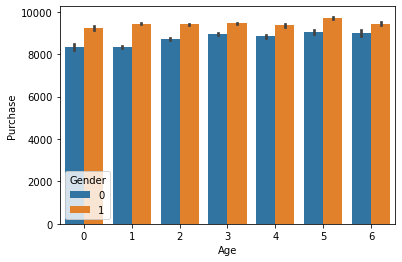

In [36]:
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

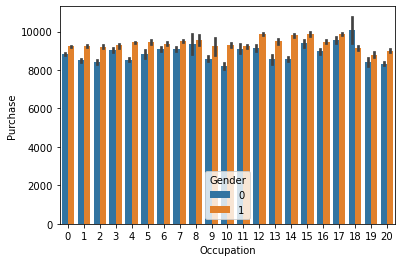

In [37]:
sns.barplot('Occupation','Purchase','Gender',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

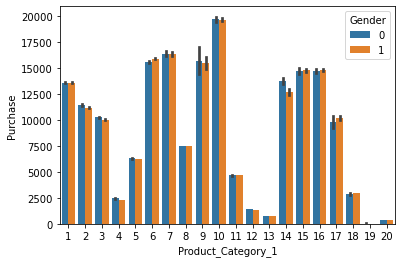

In [38]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

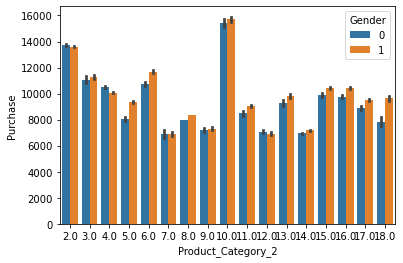

In [39]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

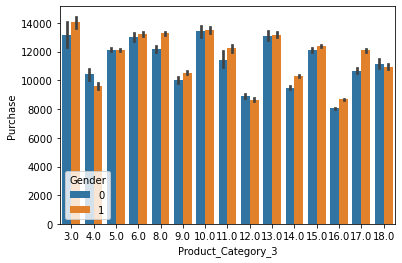

In [40]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

In [41]:
df.drop('Product_ID',axis=1,inplace=True)

In [42]:
df

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,6,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,0,2,15,4,1,8,8.0,16.0,NaN,1,0
233595,0,2,15,4,1,5,8.0,16.0,NaN,1,0
233596,0,2,15,4,1,1,5.0,12.0,NaN,1,0
233597,0,4,1,4,0,10,16.0,16.0,NaN,0,1


In [43]:
df['Purchase'].isnull().sum()

233599

In [44]:
#feature scaling
df_test=df[df['Purchase'].isnull()]
df_train=df[~df['Purchase'].isnull()]

In [45]:
X=df_train.drop('Purchase',axis=1)
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,0,10,2,0,3,8.0,16.0,0,0
1,0,0,10,2,0,1,6.0,14.0,0,0
2,0,0,10,2,0,12,8.0,16.0,0,0
3,0,0,10,2,0,12,14.0,16.0,0,0
4,1,6,16,4,0,8,8.0,16.0,0,1


In [46]:
Y=df_train['Purchase']
Y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [49]:
X_train

array([[ 0.57141282, -1.10505734,  0.90867822, ...,  0.36891877,
         1.17569512, -0.67282374],
       [ 0.57141282,  1.84716932, -1.23820419, ...,  0.36891877,
        -0.85056064, -0.67282374],
       [ 0.57141282,  0.37105599,  1.36872445, ..., -1.09182956,
        -0.85056064,  1.48627336],
       ...,
       [-1.75004823, -1.10505734, -1.08485545, ...,  0.36891877,
         1.17569512, -0.67282374],
       [-1.75004823, -1.10505734, -0.62480922, ...,  0.36891877,
         1.17569512, -0.67282374],
       [-1.75004823, -1.10505734, -0.93150671, ...,  0.36891877,
        -0.85056064, -0.67282374]])

In [50]:
X_test

array([[ 0.57141282,  1.84716932,  1.67542193, ...,  0.36891877,
        -0.85056064,  1.48627336],
       [-1.75004823,  0.37105599,  0.44863199, ...,  0.36891877,
         1.17569512, -0.67282374],
       [-1.75004823,  0.37105599, -1.23820419, ...,  0.36891877,
        -0.85056064, -0.67282374],
       ...,
       [ 0.57141282, -1.10505734, -0.93150671, ...,  0.36891877,
        -0.85056064,  1.48627336],
       [ 0.57141282,  0.37105599, -0.16476299, ...,  0.00373169,
        -0.85056064,  1.48627336],
       [ 0.57141282, -1.10505734, -0.62480922, ...,  0.36891877,
         1.17569512, -0.67282374]])